In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt


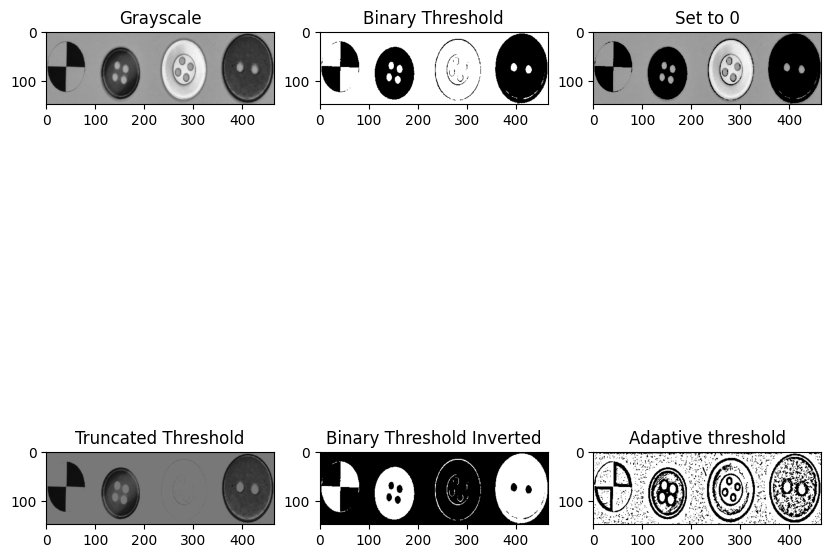

In [2]:

original = cv2.imread('buttons.png')

# to convert the image in grayscale

img = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

thresh0 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)

# applying different thresholding techniques on the input image

# all pixels value above 120 will be set to 255

ret, thresh_bin = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)

ret, thresh_bin_inv = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV)

ret, thresh_trunc = cv2.threshold(img, 120, 255, cv2.THRESH_TRUNC)

ret, thresh_tozero = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO)

ret, thresh_tozero_inv = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO_INV)



fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3, figsize = (10,10))

# when showing images in matplotlib, convert image from BGR to RGB

ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

ax1.set_title('Grayscale')

ax2.imshow(cv2.cvtColor(thresh_bin, cv2.COLOR_BGR2RGB))

ax2.set_title('Binary Threshold')

ax3.imshow(cv2.cvtColor(thresh_tozero, cv2.COLOR_BGR2RGB))

ax3.set_title('Set to 0')

ax5.imshow(cv2.cvtColor(thresh_bin_inv, cv2.COLOR_BGR2RGB))

ax5.set_title('Binary Threshold Inverted')

ax4.imshow(cv2.cvtColor(thresh_trunc, cv2.COLOR_BGR2RGB))

ax4.set_title('Truncated Threshold')

# ax6.imshow(cv2.cvtColor(thresh_tozero_inv, cv2.COLOR_BGR2RGB))

ax6.imshow(cv2.cvtColor(thresh0, cv2.COLOR_BGR2RGB))

ax6.set_title('Adaptive threshold') 

plt.show()


Text(0.5, 1.0, 'Sure Foreground')

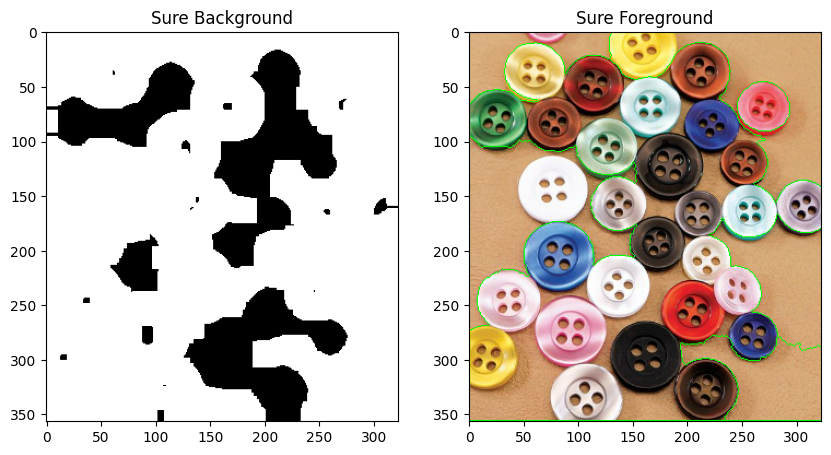

In [19]:
original = cv2.imread('buttons.png')

# to convert the image in grayscale

img = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

ret, thresh_otsu = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# display images

fig, ((ax1, ax2)) = plt.subplots(nrows = 1, ncols = 2, figsize = (10,10))


# remove noise
kernel = np.ones((5,5), np.uint8)
opening = cv2.morphologyEx(thresh_otsu, cv2.MORPH_OPEN, kernel, iterations = 2)

# dialate the image to get sure background area
sure_bg = cv2.dilate(opening, kernel, iterations = 3)


# find sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L1, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.5*dist_transform.max(), 255, 0)
sure_fg = sure_fg.astype(np.uint8)

# now find the unknown region
unknown = cv2.subtract(sure_bg, sure_fg)

# build the barriers for watershed algorithm
ret, markers = cv2.connectedComponents(sure_fg)

# add one to all the labels so that sure regions are marked with positive integers
markers = markers + 1

# mark the unknown region with zero
markers[unknown == 255] = 0

markers = cv2.watershed(original, markers)
original[markers == -1] = [0, 255, 0]

ax1.imshow(cv2.cvtColor(sure_bg, cv2.COLOR_BGR2RGB))
ax1.set_title('Sure Background')

ax2.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
ax2.set_title('Sure Foreground')


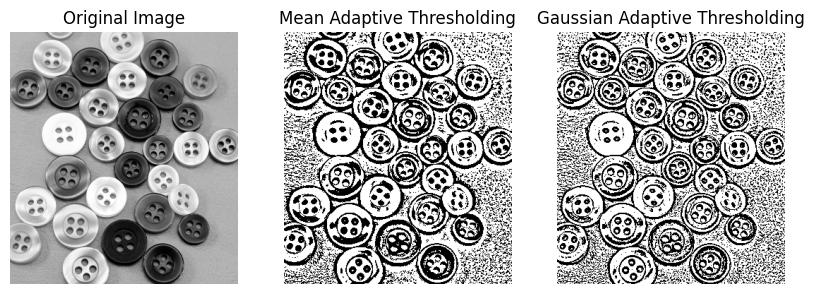

In [ ]:
image = cv2.imread('buttons.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred_image = cv2.GaussianBlur(gray_image, (3, 3), 0)

mean_thresh = cv2.adaptiveThreshold(
    gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

gaussian_thresh = cv2.adaptiveThreshold(
    gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

plt.figure(figsize=(10, 8))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Mean Adaptive Thresholding')
plt.imshow(mean_thresh, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Gaussian Adaptive Thresholding')
plt.imshow(gaussian_thresh, cmap='gray')
plt.axis('off')

plt.show()

Text(0.5, 1.0, 'Edges')

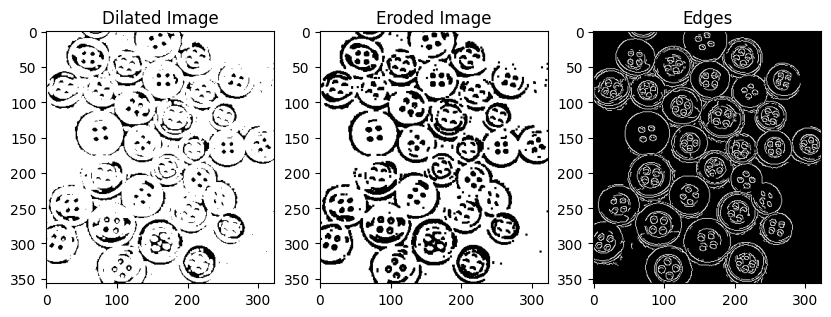

In [4]:
kernel = np.ones((3, 3), np.uint8)
dilated_image = cv2.dilate(mean_thresh, kernel, iterations=1)
eroded_image = cv2.erode(dilated_image, kernel, iterations=1)

edges = cv2.Canny(gray_image, 100, 200)

fig, ((ax1, ax2, ax3)) = plt.subplots(nrows = 1, ncols = 3, figsize = (10,10))

ax1.imshow(cv2.cvtColor(dilated_image, cv2.COLOR_BGR2RGB))
ax1.set_title('Dilated Image')

ax2.imshow(cv2.cvtColor(eroded_image, cv2.COLOR_BGR2RGB))
ax2.set_title('Eroded Image')

ax3.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
ax3.set_title('Edges')

In [ ]:
def adaptive_thresholding(image, apply_blur=False, apply_erode=False):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    if apply_blur:
        blurred_image = cv2.GaussianBlur(gray_image, (3, 3), 0)
    else:
        blurred_image = gray_image

    if apply_erode:
        kernel = np.ones((3, 3), np.uint8)
        blurred_image = cv2.erode(blurred_image, kernel, iterations=1)

    global_threshold_value, global_thresh = cv2.threshold(blurred_image, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    mean_thresh = cv2.adaptiveThreshold(
        blurred_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 2)

    gaussian_thresh = cv2.adaptiveThreshold(
        blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 2)

    return mean_thresh, gaussian_thresh, global_thresh, global_threshold_value

def plot_thresholds(original, global_thresh, mean_thresh, gaussian_thresh, global_threshold_value, title='Adaptive Thresholding Results'):
    plt.figure(figsize=(10, 8))

    plt.subplot(1, 4, 1)
    plt.title(f'Original \n({title})')
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.title(f'Global Thresholding \n(Value: {global_threshold_value})')
    plt.imshow(global_thresh, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.title('Mean Adaptive \nThresholding')
    plt.imshow(mean_thresh, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.title('Gaussian Adaptive \nThresholding')
    plt.imshow(gaussian_thresh, cmap='gray')
    plt.axis('off')


    plt.show()

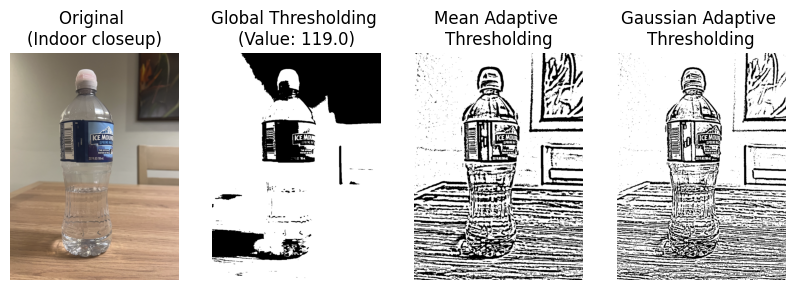

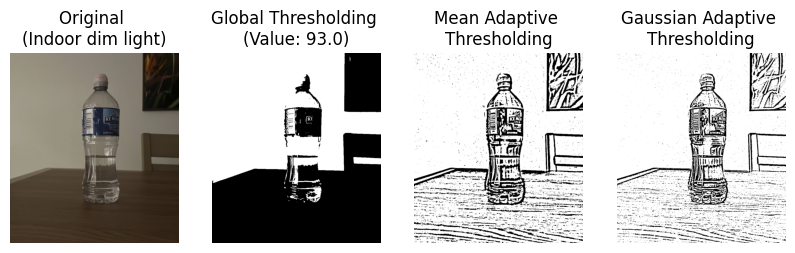

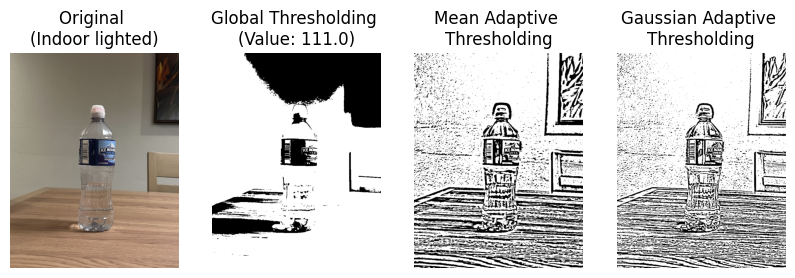

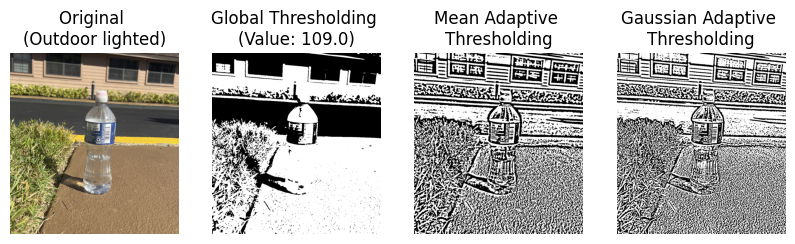

In [31]:
# load images and plot thresholds
image_paths = {'Indoor closeup':'obj_indoor_closeup.png','Indoor dim light': 'obj_indoor_dim.png', 'Indoor lighted': 'obj_indoor_lighted.png', 'Outdoor lighted': 'obj_outdoor_lighted.png'}

for title, path in image_paths.items():
    image = cv2.imread(path)
    mean_thresh, gaussian_thresh, global_thresh, global_threshold_value = adaptive_thresholding(image, True, False)
    plot_thresholds(image, mean_thresh=mean_thresh, gaussian_thresh=gaussian_thresh, global_thresh=global_thresh, global_threshold_value=global_threshold_value, title=title)